2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

In [1]:
import os
import sys
import re
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pickle
import math
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
sns.set(color_codes=True)
base = "challenge_data/"

In [2]:
# This functions plots the correlation of the numerical value of a dataframe
def plotCorrelation(dataframe):
    corr = dataframe.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(230, 5, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
    print('Correlation plot')

In [3]:
df_train = pd.read_csv(base + 'train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We won't need the 'id' column for now so we will drop it.

In [4]:
#df_train.drop('Id', axis='columns', inplace=True, errors='ignore')

We will load the testing data too and drop its ids.

In [5]:
df_test = pd.read_csv(base + 'test.csv')
#df_test.drop('Id', axis='columns', inplace=True, errors='ignore')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml
1,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
2,1203,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
3,1204,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
4,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal


## Sale Price

The train dataframe contains a column more than the test dataframe. This column is the sale price.

In order to have a first view of our data we will plot the sale prices of the train data.

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


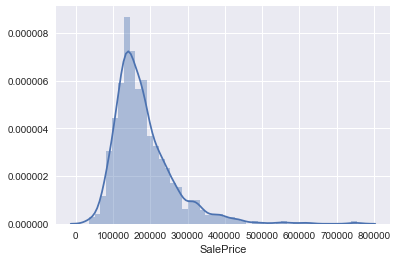

In [6]:
print(df_train['SalePrice'].describe())
sns.distplot(df_train['SalePrice']);

Skewness of the log(SalePrice) : 0.132714 
Kurtosis of the log(SalePrice) : 0.888850 


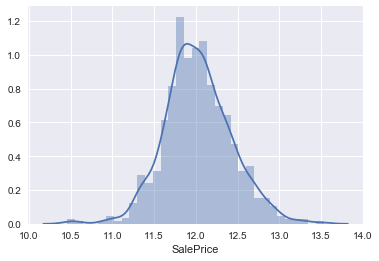

In [7]:
logSalePrice = np.log(df_train['SalePrice'])
sns.distplot(logSalePrice)
print("Skewness of the log(SalePrice) : %f " % logSalePrice.skew())
print("Kurtosis of the log(SalePrice) : %f " % logSalePrice.kurt())

The log sale price seems to follow a normal distribution. We will apply log to the saleprice in the dataframe.

In [8]:
df_train.SalePrice = np.log(df_train.SalePrice)

 Now that we have transformed the sale price we will try to get a broad idea of how each integer parameter influence sale price.

Correlation plot


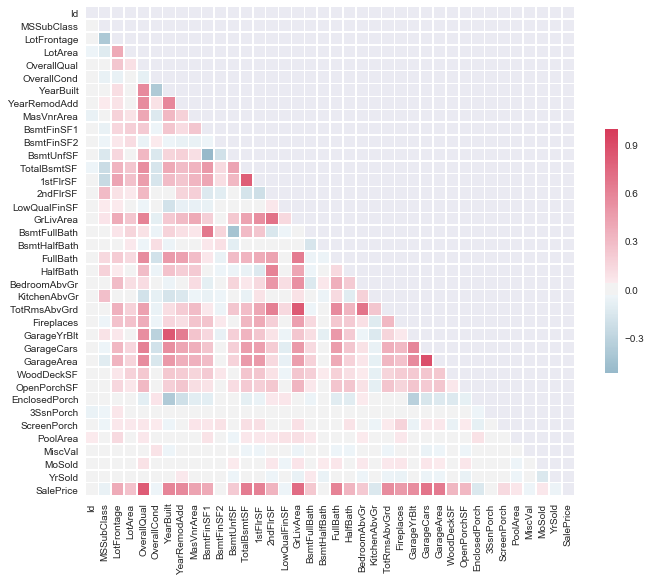

In [9]:
plotCorrelation(df_train)

In [10]:
df_train.corr().SalePrice.sort_values(ascending=False).drop('SalePrice')

OverallQual      0.818680
GrLivArea        0.728163
GarageCars       0.681809
GarageArea       0.651121
TotalBsmtSF      0.641615
1stFlrSF         0.610721
FullBath         0.607066
YearBuilt        0.590738
YearRemodAdd     0.573284
TotRmsAbvGrd     0.554775
GarageYrBlt      0.547910
Fireplaces       0.482342
MasVnrArea       0.434735
BsmtFinSF1       0.391919
LotFrontage      0.384962
2ndFlrSF         0.342669
HalfBath         0.329854
WoodDeckSF       0.326965
OpenPorchSF      0.321166
LotArea          0.257998
BsmtFullBath     0.229916
BedroomAbvGr     0.223166
BsmtUnfSF        0.215729
ScreenPorch      0.127515
PoolArea         0.066878
MoSold           0.059042
3SsnPorch        0.037274
BsmtFinSF2       0.012786
BsmtHalfBath    -0.007152
Id              -0.021938
MiscVal         -0.039808
OverallCond     -0.040769
LowQualFinSF    -0.042014
YrSold          -0.050896
MSSubClass      -0.068837
EnclosedPorch   -0.139652
KitchenAbvGr    -0.147374
Name: SalePrice, dtype: float64

Thanks to the correlation matrix we are able to get a first view of the most important parameters. However the data is not clean yet and the previous information even if very intresting isn't enough. Let's analyze each parameter but first we will print the number of missing values per column.

In [11]:
df = pd.concat([df_train.drop(columns=['SalePrice']), df_test])

## Fixing missing parameters

In [12]:
missingValues = df.isnull().sum()
print(missingValues[missingValues.values != 0].sort_values(ascending=False))
print('\nTotal of null values : ', missingValues.sum())

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Total of null values :  6965


We have a lot of missing parameters in our data set. We will fill those parameters as best as we can with the description of the data gaved in annex and also by trying to make educative guesses.

### PoolQC

In [13]:
print('Values of PoolQC ', np.unique(df.PoolQC.dropna().values))

Values of PoolQC  ['Ex' 'Fa' 'Gd']


As in real life most houses doesn't have a pool and this explains why we have 1410 "missing" entries for this parameters. Since the existing values for this feature represent a rating we will fill the nan with the string 'Na'. We will take care of this rating system in the next part of the notebook.

In [14]:
df.PoolQC.replace(np.nan,'Na',inplace=True)

### MiscFeature

In [15]:
print('Values of MiscFeature ', np.unique(df.MiscFeature.dropna().values))

Values of MiscFeature  ['Gar2' 'Othr' 'Shed' 'TenC']


In [16]:
df.MiscFeature.replace(np.nan,'Na',inplace=True)

### Alley

In [17]:
print('Values of Alley ', np.unique(df.Alley.dropna().values))

Values of Alley  ['Grvl' 'Pave']


In [18]:
df.Alley.replace(np.nan,'Na',inplace=True)

### Fence

In [19]:
print('Values of Fence ', np.unique(df.Fence.dropna().values))

Values of Fence  ['GdPrv' 'GdWo' 'MnPrv' 'MnWw']


In [20]:
df.Fence.replace(np.nan,'Na',inplace=True)

### FireplaceQu

In [21]:
print('Values of FireplaceQu ', np.unique(df.FireplaceQu.dropna().values))

Values of FireplaceQu  ['Ex' 'Fa' 'Gd' 'Po' 'TA']


In [22]:
df.FireplaceQu.replace(np.nan,'Na',inplace=True)

## GARAGE

Here we observe that information is missing for 74 houses. Moreover we saw that the area of the garage is highly correlated to the house pricing. 

In [23]:
print('Values of GarageCond ', np.unique(df.GarageCond.dropna().values))

Values of GarageCond  ['Ex' 'Fa' 'Gd' 'Po' 'TA']


In [24]:
df.GarageCond.replace(np.nan,'Na',inplace=True)

- ### GarageQual

In [25]:
print('Values of GarageQual ', np.unique(df.GarageQual.dropna().values))

Values of GarageQual  ['Ex' 'Fa' 'Gd' 'Po' 'TA']


In [26]:
df.GarageQual.replace(np.nan,'Na',inplace=True)

- ### GarageYrBlt ###

In [27]:
print('Values of GarageYrBlt ', np.unique(df.GarageYrBlt.dropna().values))

Values of GarageYrBlt  [1900. 1906. 1908. 1910. 1914. 1915. 1916. 1918. 1920. 1921. 1922. 1923.
 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935.
 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1945. 1946. 1947. 1948. 1949.
 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.
 2010.]


In [28]:
df.GarageYrBlt.replace(np.nan,0,inplace=True) #We use 0 to keep the type consistent.

- ### GarageFinish ###

In [29]:
print('Values of GarageFinish ', np.unique(df.GarageFinish.dropna().values))

Values of GarageFinish  ['Fin' 'RFn' 'Unf']


In [30]:
df.GarageFinish.replace(np.nan,'Na',inplace=True)

- ### GarageType ###

In [31]:
print('Values of GarageType ', np.unique(df.GarageType.dropna().values))

Values of GarageType  ['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd']


In [32]:
df.GarageType.replace(np.nan,'Na',inplace=True)

### BsmtFinType2

In [33]:
print('Values of BsmtFinType2 ', np.unique(df.BsmtFinType2.dropna().values))

Values of BsmtFinType2  ['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf']


In [34]:
df.BsmtFinType2.replace(np.nan,'Na',inplace=True)

### BsmtExposure

In [35]:
print('Values of BsmtExposure ', np.unique(df.BsmtExposure.dropna().values))

Values of BsmtExposure  ['Av' 'Gd' 'Mn' 'No']


In [36]:
df.BsmtExposure.replace(np.nan,'Na',inplace=True)

### BsmtFinType1

In [37]:
print('Values of BsmtFinType1 ', np.unique(df.BsmtFinType1.dropna().values))

Values of BsmtFinType1  ['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf']


In [38]:
df.BsmtFinType1.replace(np.nan,'Na',inplace=True)

### BsmtCond

In [39]:
print('Values of BsmtCond ', np.unique(df.BsmtCond.dropna().values))

Values of BsmtCond  ['Fa' 'Gd' 'Po' 'TA']


In [40]:
df.BsmtCond.replace(np.nan,'Na',inplace=True)

### BsmtQual

In [41]:
print('Values of BsmtQual ', np.unique(df.BsmtQual.dropna().values))

Values of BsmtQual  ['Ex' 'Fa' 'Gd' 'TA']


In [42]:
df.BsmtQual.replace(np.nan,'Na',inplace=True)

### MasVnrArea

In [43]:
print('Values of MasVnrArea (extract)', np.unique(df.MasVnrArea.dropna().values)[:10])

Values of MasVnrArea (extract) [ 0.  1. 11. 14. 16. 18. 22. 24. 27. 28.]


In [44]:
df.MasVnrArea.replace(np.nan,0,inplace=True)

### MasVnrType

In [45]:
print('Values of MasVnrType ', np.unique(df.MasVnrType.dropna().values))

Values of MasVnrType  ['BrkCmn' 'BrkFace' 'None' 'Stone']


In [46]:
df.MasVnrType.replace(np.nan,'None',inplace=True)

### Electrical

In [47]:
print('Values of Electrical ', np.unique(df.Electrical.dropna().values))

Values of Electrical  ['FuseA' 'FuseF' 'FuseP' 'Mix' 'SBrkr']


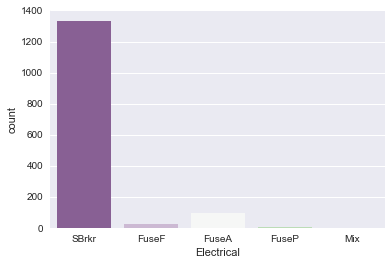

In [48]:
sns.countplot(x="Electrical", data=df, palette="PRGn");

In [49]:
df.Electrical.replace(np.nan,'SBrkr',inplace=True) #Replace with the most commun.

### LotFrontage

In [50]:
print('Values of LotFrontage ', np.unique(df.LotFrontage.dropna().values))

Values of LotFrontage  [ 21.  24.  30.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 114. 115. 116. 118. 120. 121. 122. 124. 128. 129. 130. 134. 137. 138.
 140. 141. 144. 149. 150. 152. 153. 160. 168. 174. 182. 313.]


Since it represents the linear feet of street connected to property we might want to approximate the value by the medium of all the houses. Let's plot the value of the Lot Frontage.

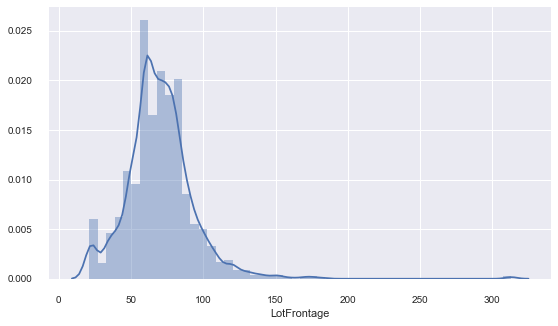

In [51]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 5))
sns.distplot(df.LotFrontage.dropna())
sns.despine(offset=10, trim=True)

In [52]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can see there are some outliers. with more than 200 LotFrontage. Maybe a more resonable way to interpret fill the data would be to use the median of the neighboorhood.

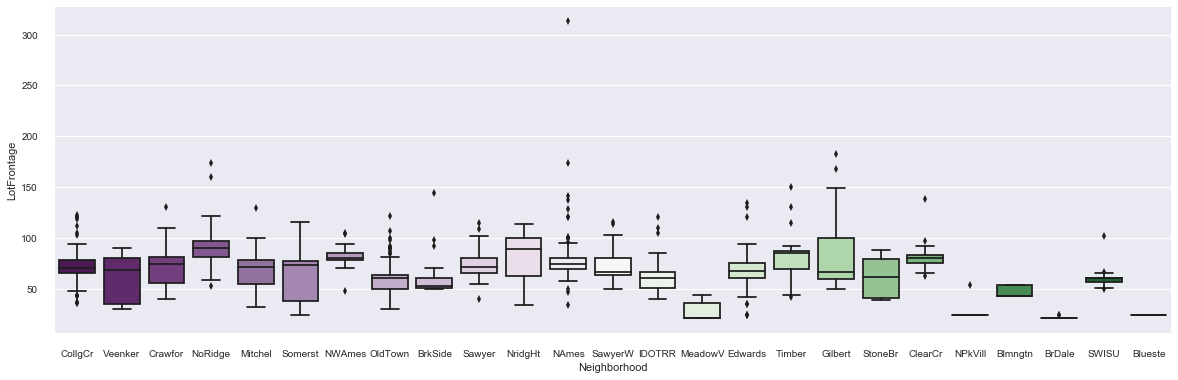

In [53]:
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x="Neighborhood", y="LotFrontage", data=df_train, palette="PRGn")
sns.despine(offset=10, trim=True)

In [54]:
NeighborhoodMedianLotFrontage = {}
for n in np.unique(df.Neighborhood.values):
    NeighborhoodMedianLotFrontage[n] = df[df.Neighborhood == n].LotFrontage.dropna().median()

In [55]:
df.LotFrontage = df.apply(lambda row: NeighborhoodMedianLotFrontage[row['Neighborhood']] if np.isnan(row['LotFrontage']) else row['LotFrontage'], axis=1)

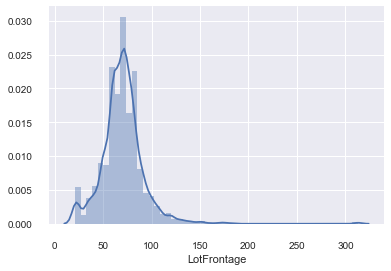

In [56]:
df.LotFrontage.dropna()
sns.distplot(df.LotFrontage.dropna())
sns.despine(offset=10, trim=True)

In [57]:
missingValues = df.isnull().sum()
print('\nTotal of missing values : ', missingValues.sum())


Total of missing values :  0


We succeed in filling the missing values of our dataset. Now we will analyze the data in order to deal with the outliers that we might have.

In [58]:
df_train = df[:len(df_train)]
df_train_with_salePrice = df_train
df_train_with_salePrice['SalePrice'] = logSalePrice
df_test = df[len(df_train):]

In [59]:
dftwsp = df_train_with_salePrice

Now that we have completed the data, we split it again.

# Outlier Removing #

We are going to have a first look at every highly correlated with sale price features:
- OverallQual      0.818680
- GrLivArea        0.728163
- GarageCars       0.681809
- GarageArea       0.651121
- TotalBsmtSF      0.641615
- 1stFlrSF         0.610721
- FullBath         0.607066
- YearBuilt        0.590738
- YearRemodAdd     0.573284
- TotRmsAbvGrd     0.554775
- GarageYrBlt      0.547910


### OverallQual ###

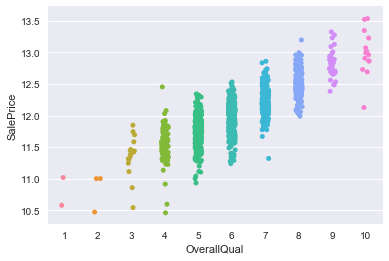

In [60]:
sns.stripplot(x="OverallQual", y="SalePrice", data=df_train_with_salePrice, jitter=True);

We can identify quite easily some outliers. Let's get their ids.

In [61]:
print("Outlier for OverralQual = 3 : ", list(dftwsp[(dftwsp.OverallQual==3) & (dftwsp.SalePrice<=10.6)].Id))
print("Outlier for OverralQual = 4 : ", list(dftwsp[(dftwsp.OverallQual==4) & ((dftwsp.SalePrice<=10.7) | (dftwsp.SalePrice>12.4))].Id))
print("Outlier for OverralQual = 7 : ", list(dftwsp[(dftwsp.OverallQual==7) & (dftwsp.SalePrice<=11.5)].Id))
print("Outlier for OverralQual = 10 : ", list(dftwsp[(dftwsp.OverallQual==10) & (dftwsp.SalePrice<=12.6)].Id))

Outlier for OverralQual = 3 :  [969]
Outlier for OverralQual = 4 :  [31, 458, 496]
Outlier for OverralQual = 7 :  [633]
Outlier for OverralQual = 10 :  [524]


### GrLivArea ###

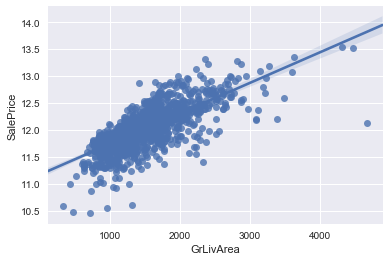

In [62]:
sns.regplot(x="GrLivArea", y="SalePrice", data=dftwsp, fit_reg=True);

In [63]:
print("Outlier for GrLivArea : ", list(dftwsp[(dftwsp.GrLivArea>4000) & (dftwsp.SalePrice<=13)].Id))
print("Outlier for GrLivArea : ", list(dftwsp[(dftwsp.SalePrice<=10.75)].Id))

Outlier for GrLivArea :  [524]
Outlier for GrLivArea :  [31, 496, 534, 917, 969]


### GarageCars ###

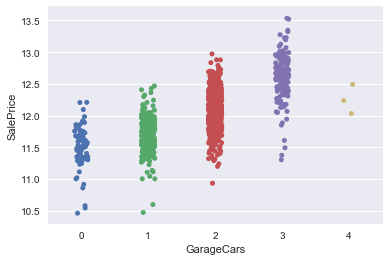

In [64]:
sns.stripplot(x="GarageCars", y="SalePrice", data=df_train_with_salePrice, jitter=True);

In [65]:
print("Outlier for GarageCars = 0 or 1 : ", list(dftwsp[dftwsp.SalePrice<=10.75].Id))
print("Outlier for GarageCars = 2 : ", list(dftwsp[(dftwsp.GarageCars==2) & ((dftwsp.SalePrice<=11))].Id))
print("Outlier for GarageCars = 3 : ", list(dftwsp[(dftwsp.GarageCars==3) & (dftwsp.SalePrice<=11.75)].Id))
print("GarageCars = 4 : ", list(dftwsp[(dftwsp.GarageCars==4)].Id))

Outlier for GarageCars = 0 or 1 :  [31, 496, 534, 917, 969]
Outlier for GarageCars = 2 :  [813]
Outlier for GarageCars = 3 :  [457, 677, 729, 1062]
GarageCars = 4 :  [421, 748, 1191]


### GarageArea ###

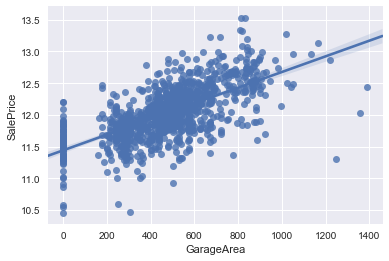

In [121]:
sns.regplot(x="GarageArea", y="SalePrice", data=dftwsp, fit_reg=True);

In [67]:
print("Outlier for GarageArea : ", list(dftwsp[(dftwsp.GarageArea>1200) & (dftwsp.SalePrice<=12.5)].Id))

Outlier for GarageArea :  [582, 1062, 1191]


### TotalBsmtSF ###

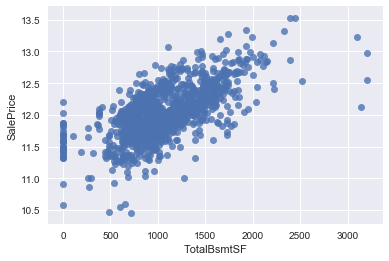

In [68]:
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=dftwsp, fit_reg=False);

In [69]:
print("Outlier for TotalBsmtSF : ", list(dftwsp[(dftwsp.TotalBsmtSF>3000)].Id))

Outlier for TotalBsmtSF :  [333, 441, 497, 524]


### 1stFlrSF ###

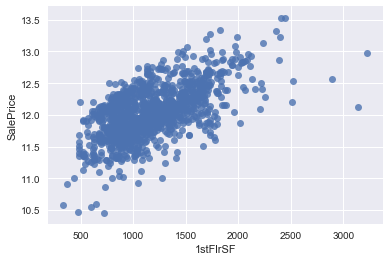

In [70]:
sns.regplot(x="1stFlrSF", y="SalePrice", data=dftwsp, fit_reg=False);

In [71]:
print("Outlier for 1stFlrSF : ", list(dftwsp[(dftwsp['1stFlrSF']>3000) & (dftwsp.SalePrice<=12.5)].Id))

Outlier for 1stFlrSF :  [524]


### FullBath ###

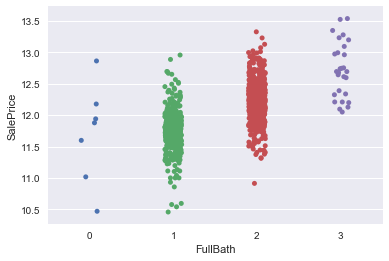

In [72]:
sns.stripplot(x="FullBath", y="SalePrice", data=df_train_with_salePrice, jitter=True);

In [73]:
print("Outlier for FullBath = 1 : ", list(dftwsp[(dftwsp.FullBath==1) & ((dftwsp.SalePrice<=10.75))].Id))
print("Outlier for FullBath = 2 : ", list(dftwsp[(dftwsp.FullBath==2) & ((dftwsp.SalePrice<=11))].Id))
print("FullBath = 0 : ", list(dftwsp[(dftwsp.FullBath==0)].Id))

Outlier for FullBath = 1 :  [31, 496, 534, 969]
Outlier for FullBath = 2 :  [706]
FullBath = 0 :  [54, 189, 376, 598, 635, 917, 1164]


### YearBuilt ###

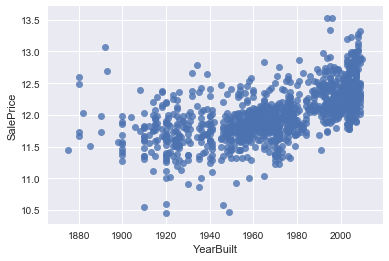

In [74]:
sns.regplot(x="YearBuilt", y="SalePrice", data=dftwsp, fit_reg=False);

## Analyzing parameters

In the following part we will analyze all the features.
* Type of data and possible values.
* Correcting missing data.
* Visualize against SalePrice.
* Visulize the repartition.

It might come handy when not comparing to SalePrice to use all the data we have.

In [75]:
df = pd.concat([df_train.drop(columns=['SalePrice']), df_test])

## Fixing missing parameters by removing them

## Converting grading string system to numbers

Several features of our data uses a grading system such as Poor, Fair, Great, Excellent. Let's convert it to numbers for future use. The first stage is to determine all the columns that we can transform.

In [76]:
stringGradingToNum = {'Na':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
stringGradingToNumKeys = list(stringGradingToNum.keys())
def isStringTypeConvertible(values) :
    for v in values:
        if v not in stringGradingToNumKeys:
            return False
    return True

In [77]:
col_convertible = [i for i in df.columns.to_series().groupby(df.dtypes).groups[np.dtype('O')] if isStringTypeConvertible(df[i].values)]
print("Columns that can be converted : ", col_convertible)

Columns that can be converted :  ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']


In [78]:
for col in col_convertible:
    df[col] = df[col].map(lambda x: stringGradingToNum[x])

In [79]:
for col in df.columns.to_series().groupby(df.dtypes).groups[np.dtype('O')]:
    print(col)
    print(np.unique(df[col].values))

MSZoning
['C (all)' 'FV' 'RH' 'RL' 'RM']
Street
['Grvl' 'Pave']
Alley
['Grvl' 'Na' 'Pave']
LotShape
['IR1' 'IR2' 'IR3' 'Reg']
LandContour
['Bnk' 'HLS' 'Low' 'Lvl']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Condition1
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Condition2
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
BldgType
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
RoofStyle
['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
RoofMatl
['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']
Exterior1st
['AsbShng' 'AsphShn

The following columns can also be converted to integers as they present some kind of rating or are binary

* Utilites
* Street
* Alley
* LandSlope
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* CentralAir
* PavedDrive
* Fence

Considering the other types of columns (int and float) some doesn't provide a ranking and therefore should be transform as categorical.

* YearBuilt*
* YearRemodAdd*
* GarageYrBlt*
* MoSold
* YrSold

In [80]:
df.YrSold = df.YrSold.astype(str)
df.MoSold = df.MoSold.astype(str)

In [81]:
UtilitesDic = {'AllPub':1, 'NoSeWa':0}
df.Utilities = df.Utilities.apply(lambda x: UtilitesDic[x])

In [82]:
StreetDic = {'Grvl':1, 'Pave':0}
df.Street = df.Street.apply(lambda x: StreetDic[x])

In [83]:
AlleyDic = {'Na':0, 'Grvl':1, 'Pave':2}
df.Alley = df.Alley.apply(lambda x: AlleyDic[x])

In [84]:
LandSlopeDic = {'Gtl':0, 'Mod':1, 'Sev':2}
df.LandSlope = df.LandSlope.apply(lambda x: LandSlopeDic[x])

In [85]:
BsmtExposureDic = {'Na':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
df.BsmtExposure = df.BsmtExposure.apply(lambda x: BsmtExposureDic[x])

In [86]:
BsmtFinTypeDic = {'ALQ':5, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'Na':0, 'Rec':3, 'Unf':1}
df.BsmtFinType1 = df.BsmtFinType1.apply(lambda x: BsmtFinTypeDic[x])
df.BsmtFinType2 = df.BsmtFinType2.apply(lambda x: BsmtFinTypeDic[x])

In [87]:
CentralAirDic = {'N':0, 'Y':1}
df.CentralAir = df.CentralAir.apply(lambda x: CentralAirDic[x])

In [88]:
PavedDriveDic = {'N':0, 'P':1, 'Y':2}
df.PavedDrive = df.PavedDrive.apply(lambda x: PavedDriveDic[x])

In [89]:
FenceDic = {'Na':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
df.Fence = df.Fence.apply(lambda x: FenceDic[x])

Correlation plot


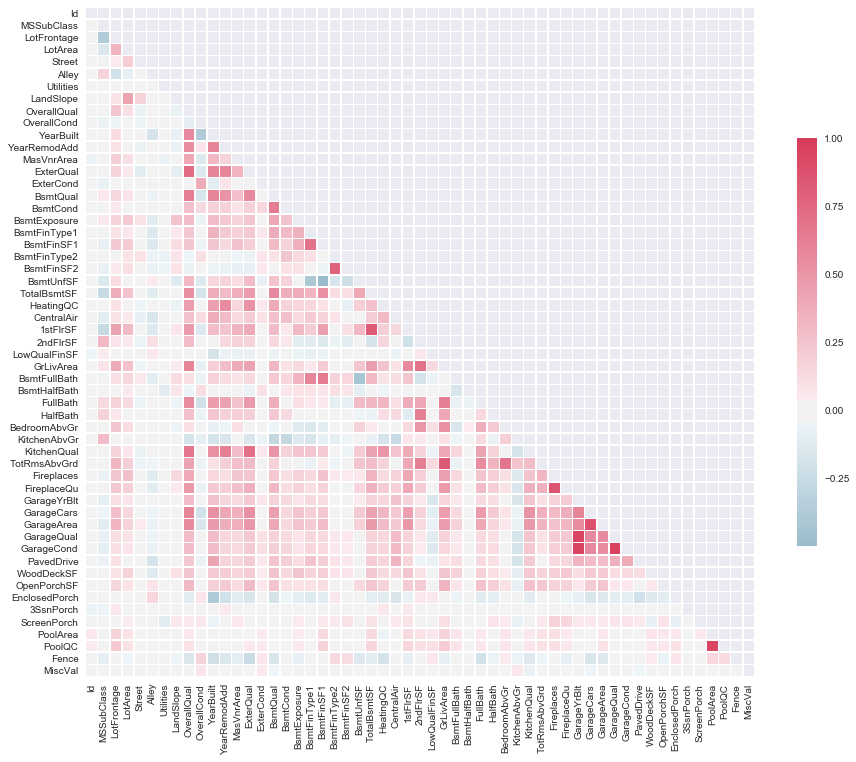

In [90]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print('Correlation plot')

In [91]:
for col in corr.columns :
    print("\nThe more correlated variable to %s are : " %col)
    print(corr[col].sort_values(ascending=False)[1:5])


The more correlated variable to Id are : 
PoolArea        0.057044
PoolQC          0.047655
BedroomAbvGr    0.037719
ExterCond       0.029860
Name: Id, dtype: float64

The more correlated variable to MSSubClass are : 
2ndFlrSF        0.307886
KitchenAbvGr    0.281721
Alley           0.179144
HalfBath        0.177354
Name: MSSubClass, dtype: float64

The more correlated variable to LotFrontage are : 
1stFlrSF       0.434109
GrLivArea      0.385190
TotalBsmtSF    0.381038
GarageArea     0.339085
Name: LotFrontage, dtype: float64

The more correlated variable to LotArea are : 
LandSlope      0.436868
LotFrontage    0.335957
1stFlrSF       0.299475
Fireplaces     0.271364
Name: LotArea, dtype: float64

The more correlated variable to Street are : 
LotArea         0.197131
LandSlope       0.179360
BsmtExposure    0.092504
BsmtFinType2    0.078212
Name: Street, dtype: float64

The more correlated variable to Alley are : 
MSSubClass       0.179144
EnclosedPorch    0.152628
2ndFlrSF         0

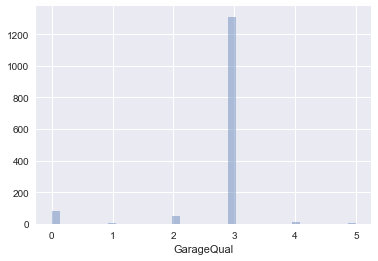

In [92]:
sns.distplot(df.GarageQual, hist=True, kde=False);

## Removing highly correlated columns

In [93]:
df = df.drop(columns=['PoolQC','GarageCond','GarageYrBlt','GarageCars'])

Correlation plot


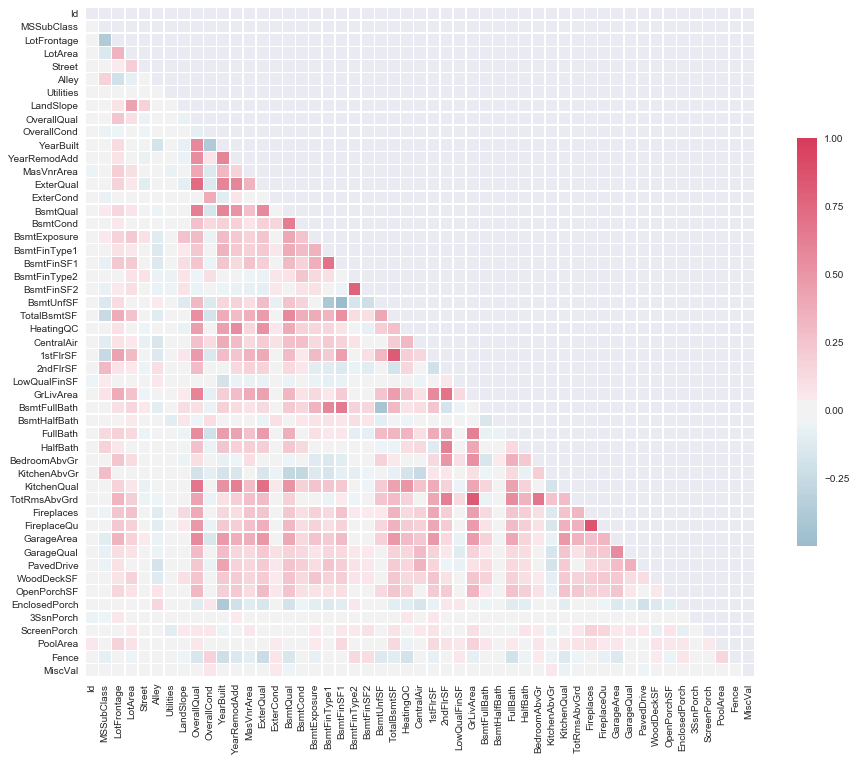

In [94]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print('Correlation plot')

Let's now add new columns and see the results

In [95]:
df['TotalSurface'] = df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']


Correlation plot


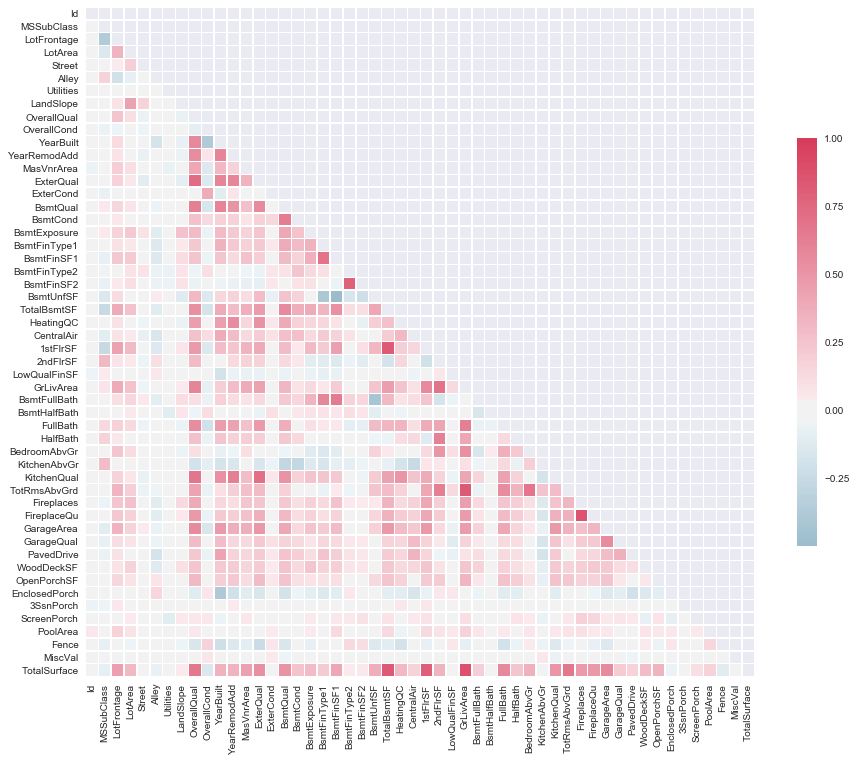

In [96]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print('Correlation plot')

Our data is ready to be use. However we did not look for outliers, nor use the correlationn between the features. Those are ideas for future improvement that we might consider depending on the time, and correctness of the models we can create.

In [97]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSurface
0,1,60,RL,65.0,8450,0,0,Reg,Lvl,1,...,0,0,0,Na,0,2,2008,WD,Normal,2566
1,2,20,RL,80.0,9600,0,0,Reg,Lvl,1,...,0,0,0,Na,0,5,2007,WD,Normal,2524
2,3,60,RL,68.0,11250,0,0,IR1,Lvl,1,...,0,0,0,Na,0,9,2008,WD,Normal,2706
3,4,70,RL,60.0,9550,0,0,IR1,Lvl,1,...,0,0,0,Na,0,2,2006,WD,Abnorml,2473
4,5,60,RL,84.0,14260,0,0,IR1,Lvl,1,...,0,0,0,Na,0,12,2008,WD,Normal,3343


### Handling Skewness


After looking at various cases it seemed that having some __skewed__ data had a real impact on overfitting.
To solve this issue we first loo at how many numerical skewed features we have and then the idea is to apply boxcox transformation to the most skewed ones.

You can find an explication of the transformation here:
- __[Box cox](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.boxcox.html)__
 
In our case we use the boxcox of $1+x$ instead:
- __[Box Cox 1p](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.special.boxcox1p.html)__


Because we can only solve skewness for numerical values an idea was to do such a transformation after dummies.
However it wasn't efficient

In [100]:
from scipy.stats import skew
from scipy.special import boxcox1p

In [124]:
numerical_features = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_features = df[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

df_skewness = pd.DataFrame({'Skew' :skewed_features})
df_skewness.head(10)

,Skew
Street,15.502821
PoolArea,14.363418
3SsnPorch,7.827826
LowQualFinSF,7.593301
MiscVal,5.505530
LandSlope,4.345857
KitchenAbvGr,3.995746
Alley,3.991285
BsmtHalfBath,3.943685
ScreenPorch,3.184431


In [125]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

There are 52 skewed numerical features to Box Cox transform


### Transforming into dummies
This steps permits to have numerical values (which will be required by xgboost later)

In [114]:
df_dummies = pd.get_dummies(df)

In [115]:
df_train_d = df_dummies[:len(df_train)]
df_train_t = df_train.SalePrice
df_test_d = df_dummies[len(df_train):]

In [116]:
df_train_d_cat = df[:len(df_train)]
df_test_d_cat = df[len(df_train):]

In [117]:
df_test_d_cat.shape

(260, 77)

## Creating our models

We are going to try different approach to see which one is less biased:
- regression with Lasso,ElasticNet and Ridge
- Tree based with xgboost
- Svm

In [118]:
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, MultiTaskLasso,LassoCV
from sklearn.model_selection import cross_val_score,GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

In [119]:
def compute_error(model) :
    kFold = KFold(n_splits=6, shuffle=True)
    return -np.sqrt(-cross_val_score(model,X=df_train_d,y=df_train_t,cv=kFold, scoring="neg_mean_squared_error"))

### XGBoost

We use a grid search to find the best param

In [107]:
#trying to find best params for XGBOOST

xgboost=xgb.XGBRegressor()
parameters={'colsample_bytree':[0.95,1.0],'learning_rate':[0.10,0.15],'max_depth':[4,5],'reg_lambda':[2.5,3.0,3.5],'subsample':[0.5,0.6,0.7],'reg_alpha':[0.0005,0.001]}
clf=GridSearchCV(xgboost,parameters,scoring='neg_mean_squared_error',n_jobs=-1,return_train_score=True,cv=3,verbose=True)
clf.fit(df_train_d,df_train_t)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   42.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.5, 0.6, 0.7], 'max_depth': [4, 5], 'reg_lambda': [2.5, 3.0, 3.5], 'reg_alpha': [0.0005, 0.001], 'colsample_bytree': [0.95, 1.0], 'learning_rate': [0.1, 0.15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=True)

In [108]:
xgb=clf.best_estimator_
print(xgb)
print(compute_error(xgb).mean())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.95, gamma=0, learning_rate=0.15,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.0005, reg_lambda=2.5,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)
-0.10868618601254613


### Random forest

In [131]:
RF = RandomForestRegressor()
randomForestParam = {'n_estimators':[10,15,20,50,75,100],'max_depth':list(range(3,16)), 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,.9,1.]}
rclf=GridSearchCV(RF,randomForestParam,scoring='neg_mean_squared_error',n_jobs=-1,return_train_score=True,cv=6,verbose=True)
rclf.fit(df_train_d,df_train_t)

Fitting 6 folds for each of 780 candidates, totalling 4680 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1103 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 1906 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2456 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3106 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4680 out of 4680 | elapsed:  4.8min finished


GridSearchCV(cv=6, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'n_estimators': [10, 15, 20, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=True)

In [132]:
RF=rclf.best_estimator_
print(RF)
print(compute_error(RF).mean())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-0.1164652960414309


### Lasso

In [120]:
def LassoParam(alpha,random_state=1):
    lasso =  Lasso(alpha =alpha, random_state=random_state)
    return compute_error(lasso).mean()

LassoBO = BayesianOptimization(LassoParam, {'alpha':(0.0004,0.0008)})
LassoBO.maximize(n_iter=10)

Initialization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    1 | 00m00s |   -0.12287 |    0.0007 | 
    2 | 00m00s |   -0.12295 |    0.0006 | 
    3 | 00m00s |   -0.12301 |    0.0006 | 
    4 | 00m00s |   -0.12210 |    0.0007 | 
    5 | 00m00s |   -0.12177 |    0.0007 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    6 | 00m02s |   -0.12349 |    0.0008 | 
    7 | 00m04s |   -0.12214 |    0.0004 | 
    8 | 00m13s |   -0.12224 |    0.0005 | 
    9 | 00m13s |   -0.12382 |    0.0007 | 
   10 | 00m16s |   -0.12346 |    0.0005 | 
   11 | 00m12s |   -0.12260 |    0.0004 | 
   12 | 00m08s |   -0.12229 |    0.0007 | 
   13 | 00m14s |   -0.12375 |    0.0006 | 
   14 | 00m09s |   -0.12263 |    0.0008 | 
   15 | 00m11s |   -0.12187 |    0.0005 | 


In [128]:
LassoBO.res['max']

{'max_params': {'alpha': 0.0007061206795311522},
 'max_val': -0.12176939160276047}

In [130]:
ENregressor=ElasticNet()
ENparameters={'l1_ratio':[0.04,0.06,0.05,],'alpha':[0.01,0.012,0.008]}
clf1=GridSearchCV(ENregressor,ENparameters,scoring='neg_mean_squared_error',n_jobs=1,return_train_score=True,cv=3,verbose=True)
clf1.fit(df_train_d,df_train_t)
#print(compute_error(ENregressor))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'l1_ratio': [0.04, 0.06, 0.05], 'alpha': [0.01, 0.012, 0.008]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=True)

In [131]:
en=clf1.best_estimator_
print(en)
print(compute_error(en).mean())

ElasticNet(alpha=0.008, copy_X=True, fit_intercept=True, l1_ratio=0.04,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
-0.12330275782432583


## SVM

In [ ]:
svm=SVR()
SVMparameters={ 'C':[0.76,0.74,0.75],'gamma':[0.0000002,0.0000001,0.0000003],'epsilon':[,0.029,0.03,0.031]}
clf2=GridSearchCV(svm,SVMparameters,scoring='neg_mean_squared_error',n_jobs=-1,return_train_score=True,cv=3,verbose=True)
clf2.fit(df_train_d,df_train_t)



In [ ]:

svm=clf2.best_estimator_
print(svm)
print(compute_error(svm).mean())

This results aren't satisfying lets try another SVM for instance Kernel Ridge Regression

In [132]:
kr=KernelRidge()
KRRparameters={'alpha':[0.2,0.1,0.3],'kernel':['polynomial'],'degree':[1,2,3],'coef0':[1,2,3,4,5]}
clf3=GridSearchCV(kr,KRRparameters,scoring='neg_mean_squared_error',n_jobs=1,return_train_score=True,cv=3,verbose=True)
clf3.fit(df_train_d,df_train_t)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    9.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.2, 0.1, 0.3], 'kernel': ['polynomial'], 'degree': [1, 2, 3], 'coef0': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=True)

In [134]:
krr=clf3.best_estimator_
print(krr)
print(compute_error(krr).mean())

KernelRidge(alpha=0.1, coef0=4, degree=1, gamma=None, kernel='polynomial',
      kernel_params=None)
-0.12449943308484367


## First attempt at stacking

In [136]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [148]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models,weights):
        self.models = models
        self.weights = weights
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.average(predictions, axis=1,weights=self.weights) 

In [149]:
xgboost=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.95, gamma=0, learning_rate=0.15,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.0005, reg_lambda=2.5,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

randomForrest= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

en= ElasticNet(alpha=0.008, copy_X=True, fit_intercept=True, l1_ratio=0.04,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

krr=KernelRidge(alpha=0.1, coef0=4, degree=1, gamma=None, kernel='polynomial',
      kernel_params=None)

In [ ]:
lasso=Lasso(alpha=0.00076)

averaged_models = AveragingModels(models = (xgboost,lasso,krr,en,randomForrest),weights=(0.1,0.2,0.2,0.25,0.25))
print(compute_error(averaged_models).mean())

In [140]:
print(compute_error(krr).mean())
print(compute_error(xgboost).mean())
print(compute_error(lasso).mean())
print(compute_error(en).mean())

-0.12583637256253813
-0.13580587517976334
-0.1233818532440788
-0.12372339242916379
